- **Indian startup funding analysis-exploratory data analysis**

In [45]:
#Loading and first look
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [46]:
#load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv')

In [47]:
#basic dataset information
df.shape

(102, 8)

In [48]:
df.columns.tolist()


['No.',
 'Company',
 'Sector',
 'Entry Valuation^^ ($B)',
 'Valuation ($B)',
 'Entry',
 'Location',
 'Select Investors']

In [49]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


- data quality assessment


In [50]:
# check data types and missing values
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object


In [51]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


In [52]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [53]:
#basic statistics
df.describe()

,No.,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


**key insights to duscuss:**
- Dataset contains 102 indian unicorn startups
- No missing values(clean dataset)
- Mix of categorical and numerical data
- Entry dates span from 2011 to 2022

- DATA PREPROCESSING

In [54]:
#clean columns names
df.columns = df.columns.str.strip()

In [55]:
#convert entry column to datetime
df['Entry_date'] = pd.to_datetime(df['Entry'],format='%b/%Y')
df['Entry_year']=df['Entry_date'].dt.year
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_date,Entry_year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015


In [56]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object
Entry_date,datetime64[ns]
Entry_year,int32


In [57]:
#create valuation growth metric
df['Valuation_Growth'] = df['Valuation ($B)'] / df['Entry Valuation^^ ($B)']
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_date,Entry_year,Valuation_Growth
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765


In [58]:
# extract primary city(before'/')
df['Primary_City'] = df['Location'].str.split('/').str[0]
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_date,Entry_year,Valuation_Growth,Primary_City
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida


In [59]:
#count number of investors
df['Investors_Count'] = df['Select Investors'].str.count(',') + 1
df.head()


,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_date,Entry_year,Valuation_Growth,Primary_City,Investors_Count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida,4


-  univariate analysis

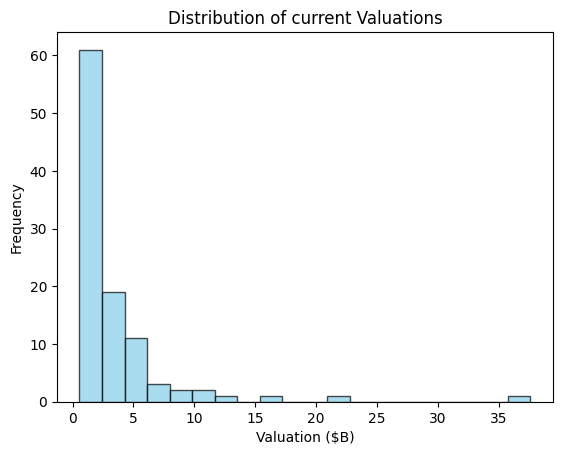

In [60]:
#valuation distribution analysis
plt.hist(df['Valuation ($B)'], bins=20,alpha=0.7,color='skyblue',edgecolor='black')
plt.title('Distribution of current Valuations')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.show()

**key insights**
- highly right-skewed distribution(few mega-unicorns)
- median valudation around 2-3B-Flipkartdominateswith37.6B validation
- most unicorns clustered in $1-5B range

- selector analysis

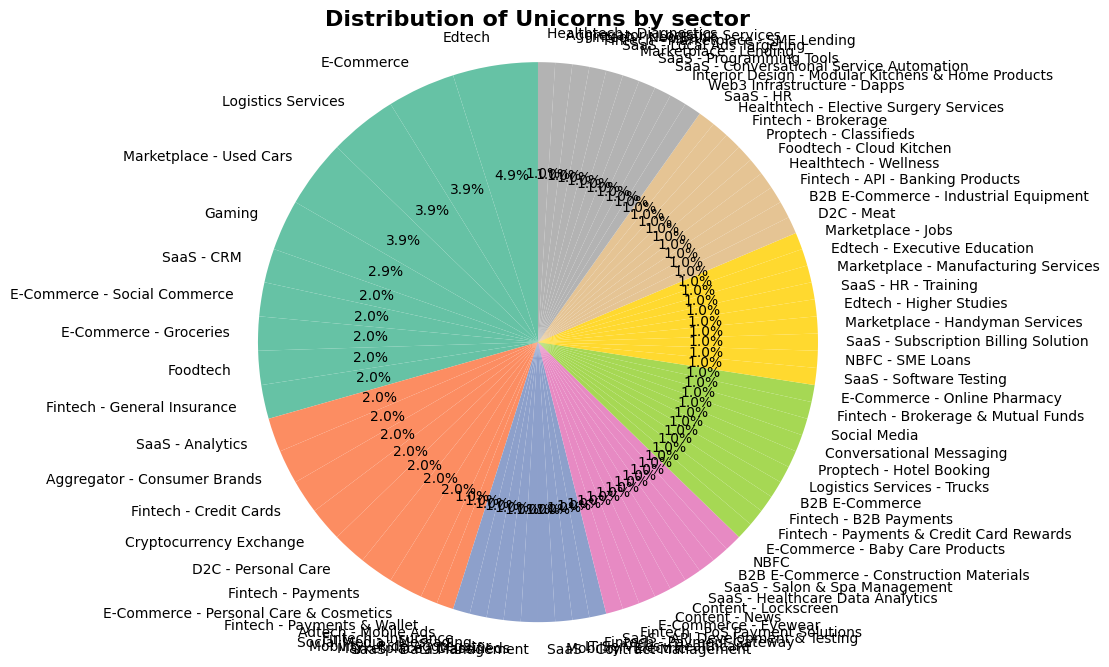

In [61]:
# selector distribution
plt.figure(figsize=(12,8))

sector_counts = df['Sector'].value_counts()
colors=plt.cm.Set2(np.linspace(0,1,len(sector_counts)))

plt.pie(sector_counts.values,labels=sector_counts.index,autopct='%1.1f%%',colors=colors,startangle=90)
plt.axis('equal')
plt.title('Distribution of Unicorns by sector', fontsize=16, fontweight='bold')
plt.show()


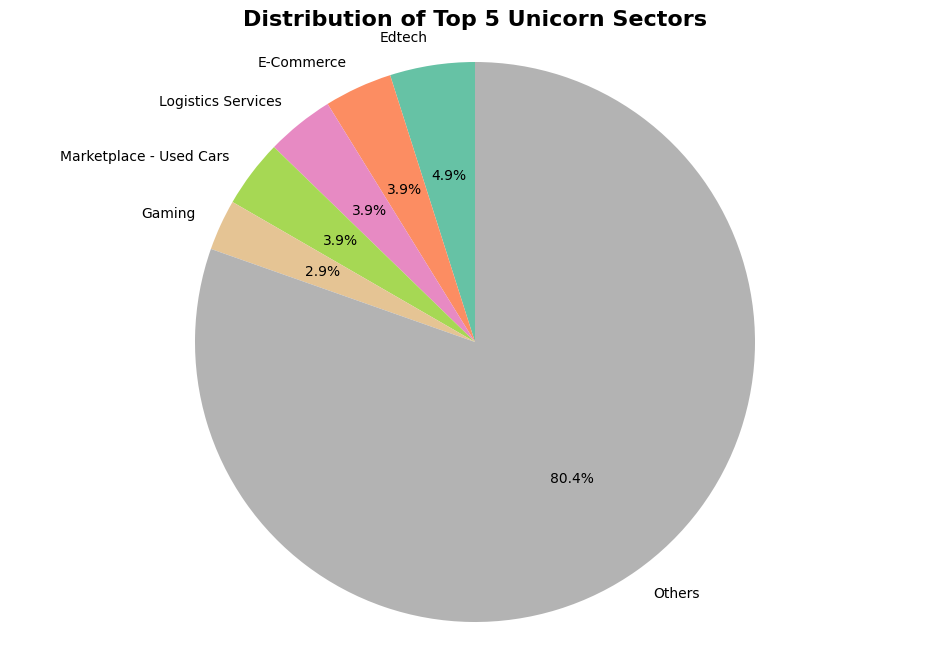

In [62]:
def display_top_k_sectors(df,k):
  sector_counts = df['Sector'].value_counts()

  #select top k sectors and group the rest as 'Others'
  if k < len(sector_counts):
    top_sectors = sector_counts.head(k)
    other_sectors_count = sector_counts[k:].sum()
    top_sectors['Others'] = other_sectors_count
  else:
    top_sectors =sector_counts

  plt.figure(figsize=(12,8))
  colors = plt.cm.Set2(np.linspace(0,1,len(top_sectors)))

  plt.pie(top_sectors.values,labels=top_sectors.index,autopct='%1.1f%%',colors=colors,startangle=90)
  plt.title(f'Distribution of Top {k} Unicorn Sectors', fontsize=16, fontweight='bold')
  plt.axis('equal')
  plt.show()

  #call the function with k=5 to display top 5 sectors
display_top_k_sectors(df,5)

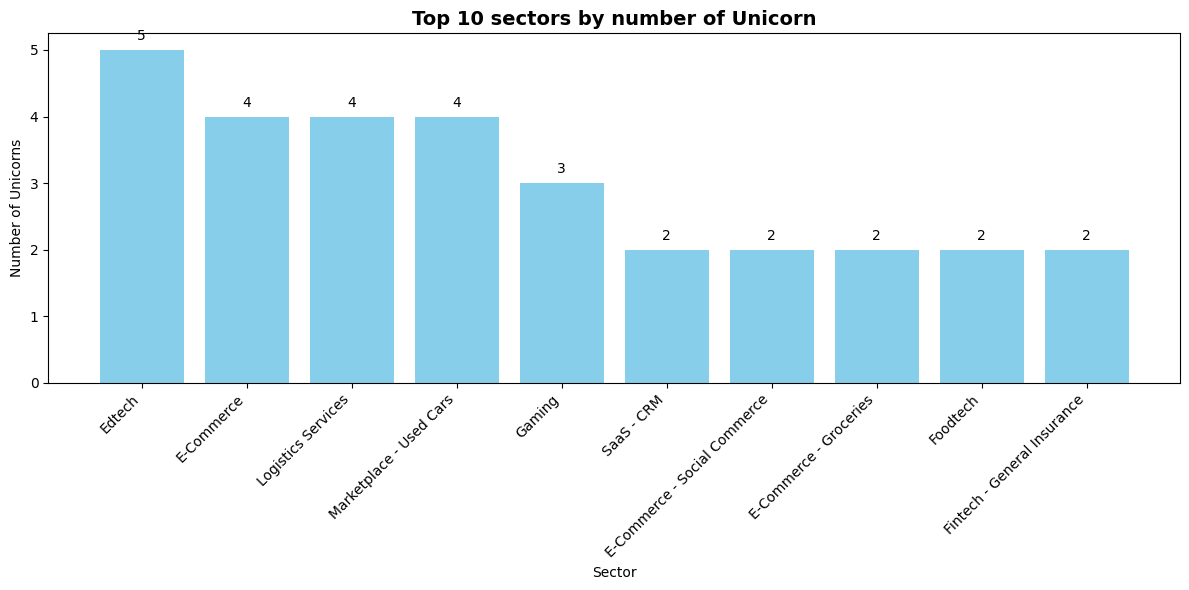

In [63]:
#top selectors bar chart
plt.figure(figsize=(12,6))
top_sectors = sector_counts.head(10)
bars = plt.bar(range(len(top_sectors)),top_sectors.values,color='skyblue')
plt.title('Top 10 sectors by number of Unicorn',fontsize=14,fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Number of Unicorns')
plt.xticks(range(len(top_sectors)),top_sectors.index, rotation=45, ha='right')

#add value labels on bars
for bar, value in zip(bars,top_sectors.values):
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() +0.1,str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


**key insights**
- EdTech leads with highest number of unicorns
- E-commerce and SaaS are major contributiors
- EdTech emergence as significant sector
- Diversification across multiple sectors

- Geographic distribution

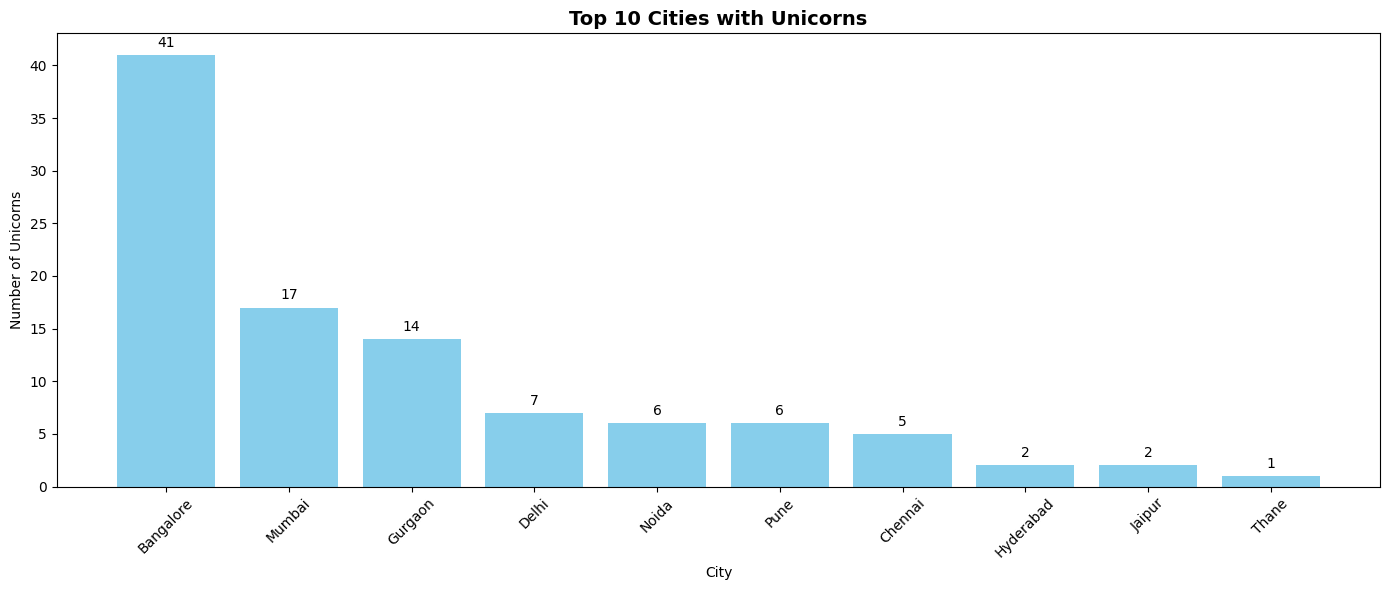

In [64]:
# city-wise distribution
plt.figure(figsize=(14,6))

city_counts = df['Primary_City'].value_counts().head(10)
bars = plt.bar(city_counts.index,city_counts.values,color='skyblue')
plt.title('Top 10 Cities with Unicorns',fontsize=14,fontweight='bold')
plt.xlabel('City')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45)

#add value labels
for bar, value in zip(bars,city_counts.values):
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() +0.5,str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [70]:
# create a summary table
city_summary = df.groupby('Primary_City').agg({
    'Valuation ($B)':['count','sum','mean'],
    'Entry_year': ['min','max']
}).round(2)
city_summary.columns = ['Count','Total Valuation', 'Average Valuation','First Entry','Last Entry',]
city_summary.head(10)

,Count,Total Valuation,Average Valuation,First Entry,Last Entry
Primary_City,,,,,
Bangalore,41,185.20,4.52,2011,2022
Chennai,5,12.20,2.44,2018,2022
Delhi,7,15.53,2.22,2014,2022
Goa,1,1.53,1.53,2022,2022
Gurgaon,14,37.94,2.71,2015,2022
Hyderabad,2,2.50,1.25,2020,2022
Jaipur,2,2.90,1.45,2021,2022
Mumbai,17,42.80,2.52,2018,2022
Noida,6,30.90,5.15,2015,2022


**key insights**
- Banglore dominates with highest number of unicorns
- mumbai and gurgaon are other major hubs
- Geographic concentration in tech cities
- banglore leads both count and total valuation

- Temporal analysis


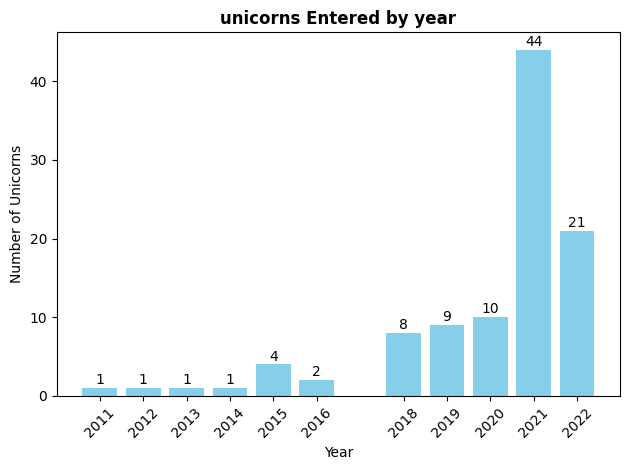

In [73]:
# entry year trends
yearly_entries = df['Entry_year'].value_counts().sort_index()
bars=plt.bar(yearly_entries.index,yearly_entries.values,color='skyblue')

plt.title('unicorns Entered by year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.xticks(yearly_entries.index,rotation=45)

#add values labels
for bar, value in zip(bars,yearly_entries.values):
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() +0.1,str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

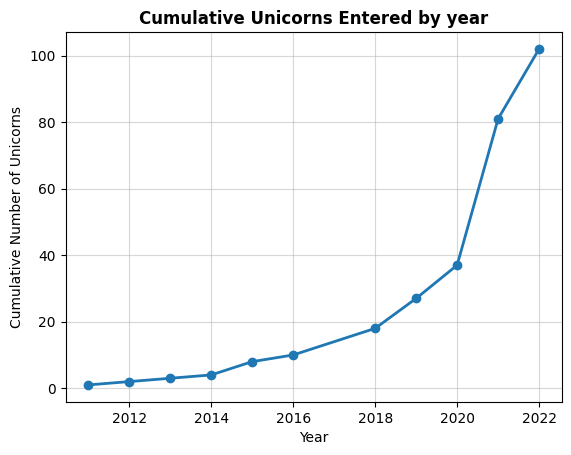

In [74]:
#cumulative unicorns
cumulative = yearly_entries.cumsum()
plt.plot(cumulative.index,cumulative.values,marker='o',linewidth=2,)
plt.title('Cumulative Unicorns Entered by year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Unicorns')
plt.grid(True,alpha=0.5)
plt.show()

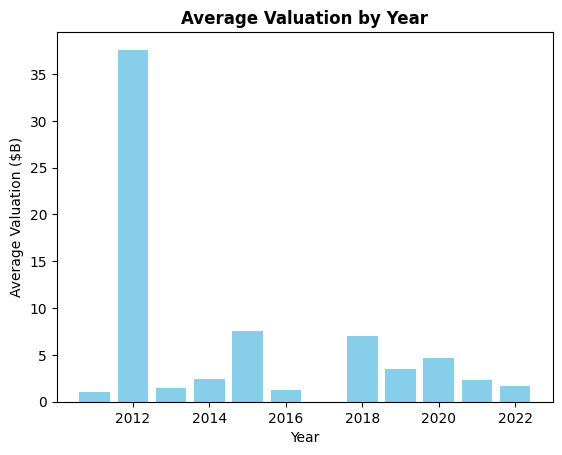

In [75]:
#average valuation by year
avg_val_by_year = df.groupby('Entry_year')['Valuation ($B)'].mean()
plt.bar(avg_val_by_year.index,avg_val_by_year.values,color='skyblue')
plt.title('Average Valuation by Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Valuation ($B)')
plt.show()

In [87]:
#sector evoluation over time
def display_k_sector_evolution(df,k):
  #group by year and sector,count occurances
  sector_year = df.groupby(['Entry_year','Sector']).size().unstack(fill_value=0)

  #select top k sectors based on overall count
  top_k_sectors_names = df['Sector'].value_counts().head(k).index.tolist()

  sector_year = sector_year[top_k_sectors_names]

  plt.figure(figsize=(15,8))
  sector_year.plot(kind='bar',alpha=0.7,ax=plt.gca())

  plt.title(f'Evolution of top{k} Sectors Over Time',fontweight='bold')
  plt.xlabel('Year')
  plt.ylabel('Number of Unicorns')
  plt.legend(title='Sector',bbox_to_anchor=(1.05,1),loc='upper left')
  plt.yticks(range(0,sector_year.values.max()+5))
  plt.grid(True,alpha=0.3)
  plt.tight_layout()
  plt.show()



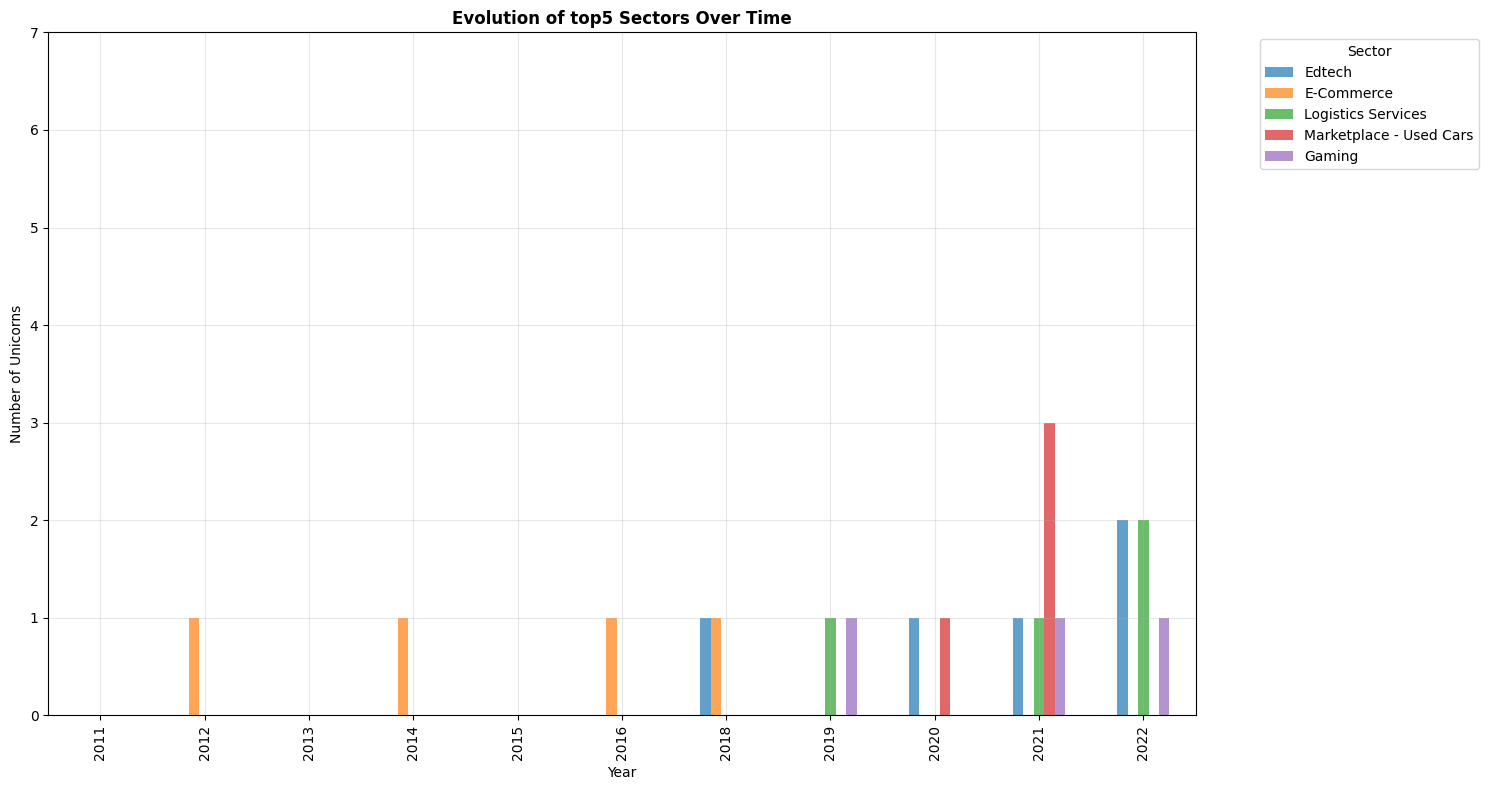

In [89]:
#call the function with k=5
display_k_sector_evolution(df,5)